<a href="https://colab.research.google.com/github/MMazenA/CovidTracker/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tabula-py
!pip install geopandas

     |████████████████████████████████| 11.7MB 353kB/s 
     |████████████████████████████████| 972kB 5.3MB/s 
     |████████████████████████████████| 14.8MB 297kB/s 
     |████████████████████████████████| 6.5MB 31.7MB/s 


In [ ]:
# Imports
import numpy as np
from pylab import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import f_oneway
from tabula import read_pdf


#Excel file import
url='https://data.cdc.gov/api/views/9bhg-hcku/rows.csv?accessType=DOWNLOAD'

#Copying the file into workable variable
dataset=pd.read_csv(url)
dataset.columns=['Data as of','Start Week','End Week','State','Sex','Age group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths','Footnote']


#Seperation
date=dataset.xs('Data as of',axis=1)
startWeek=dataset.xs('Start Week',axis=1)
endWeek=dataset.xs('End Week',axis=1)
state=dataset.xs('State',axis=1)
sex=dataset.xs('Sex',axis=1)
ageGroup=dataset.xs('Age group',axis=1)
deaths=dataset.xs('COVID-19 Deaths',axis=1)
totalDeaths=dataset.xs('Total Deaths',axis=1)
pDeaths=dataset.xs('Pneumonia Deaths',axis=1)
PCDeaths=dataset.xs('Pneumonia and COVID-19 Deaths',axis=1)
iDeaths=dataset.xs('Influenza Deaths',axis=1)
PICDeaths=dataset.xs('Pneumonia, Influenza, or COVID-19 Deaths',axis=1)
footnotes=dataset.xs('Footnote',axis=1)

#Unfiltered
dataUnfiltered=dataset
#Deleting empty cells
dataset = dataset[dataset.Footnote !='One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.']

#Chart/Summary
dataset.head()


,Data as of,Start Week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,01/13/2021,01/01/2020,01/09/2021,United States,All Sexes,All Ages,329593.0,3247306.0,319102.0,152620.0,8696.0,503675.0,NaN
1,01/13/2021,01/01/2020,01/09/2021,United States,All Sexes,Under 1 year,34.0,18083.0,192.0,6.0,21.0,241.0,NaN
2,01/13/2021,01/01/2020,01/09/2021,United States,All Sexes,0-17 years,157.0,31847.0,529.0,28.0,175.0,833.0,NaN
3,01/13/2021,01/01/2020,01/09/2021,United States,All Sexes,1-4 years,21.0,3329.0,117.0,3.0,59.0,194.0,NaN
4,01/13/2021,01/01/2020,01/09/2021,United States,All Sexes,5-14 years,55.0,5334.0,151.0,10.0,74.0,270.0,NaN


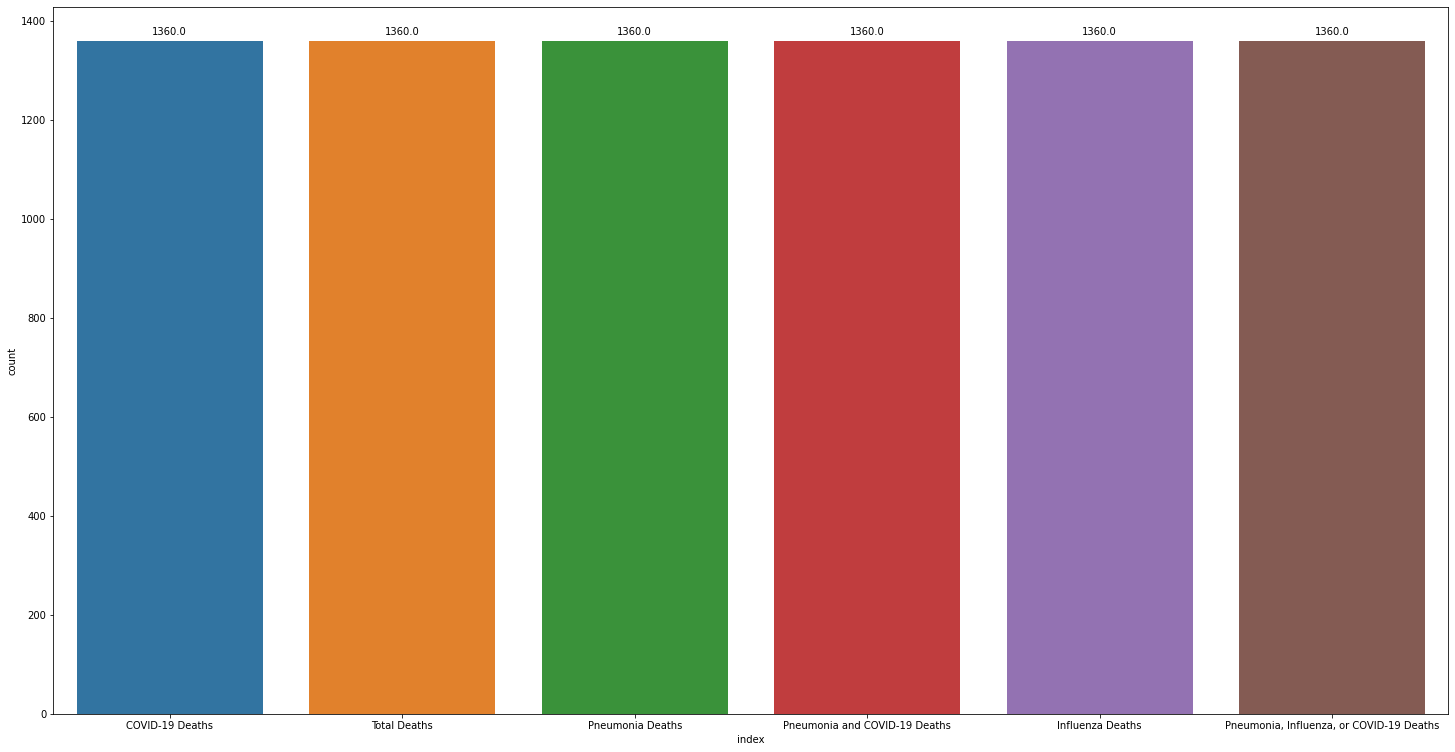

In [ ]:
#Checking that all counts are equal
plt.figure(figsize=(25,13))
info=dataset.describe().loc[['count']]
info=info.transpose()
info.reset_index(level=0, inplace=True)

count=info.xs('count',axis=1)
deathType=info.xs('index',axis=1)

bplot=sns.barplot(x=deathType,y=count,data=info,)
#little cute numbers on top with ugly code 
for p in bplot.patches:
  bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


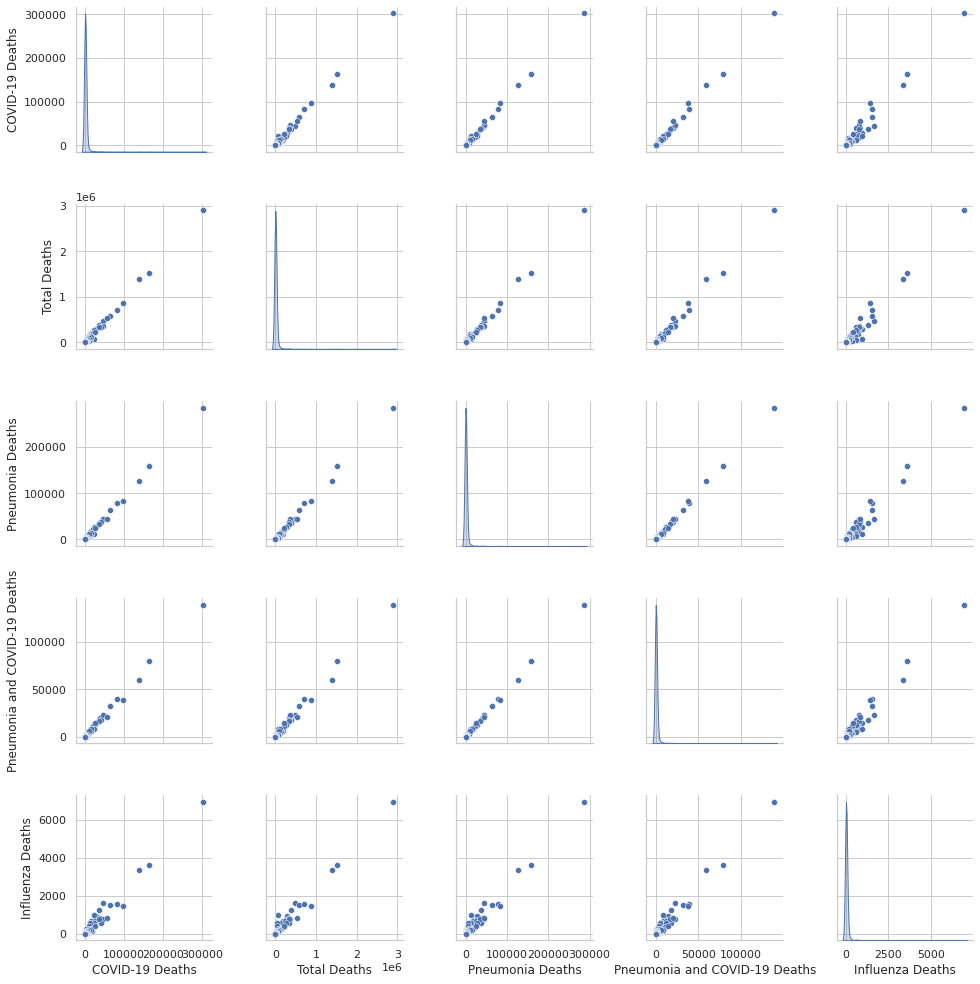

In [ ]:
datasetN=dataset
#Graphing all numerical values

g=sns.pairplot(dataset[['COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths']], diag_kind='kde')
g.fig.set_size_inches(14,14)

In [ ]:
#Seperation
#dataplot
dataage=dataset.iloc[1:16]
dataage.columns=['Data as of','Start Week','End Week','State','Sex','Age group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths','Footnote']
dataage=dataage[['Age group','COVID-19 Deaths']]
dataage

,Age group,COVID-19 Deaths
1,Under 1 year,32.0
2,0-17 years,147.0
3,1-4 years,19.0
4,5-14 years,51.0
5,15-24 years,483.0
6,18-29 years,1180.0
7,25-34 years,2087.0
8,30-49 years,12341.0
9,35-44 years,5398.0
10,45-54 years,14496.0


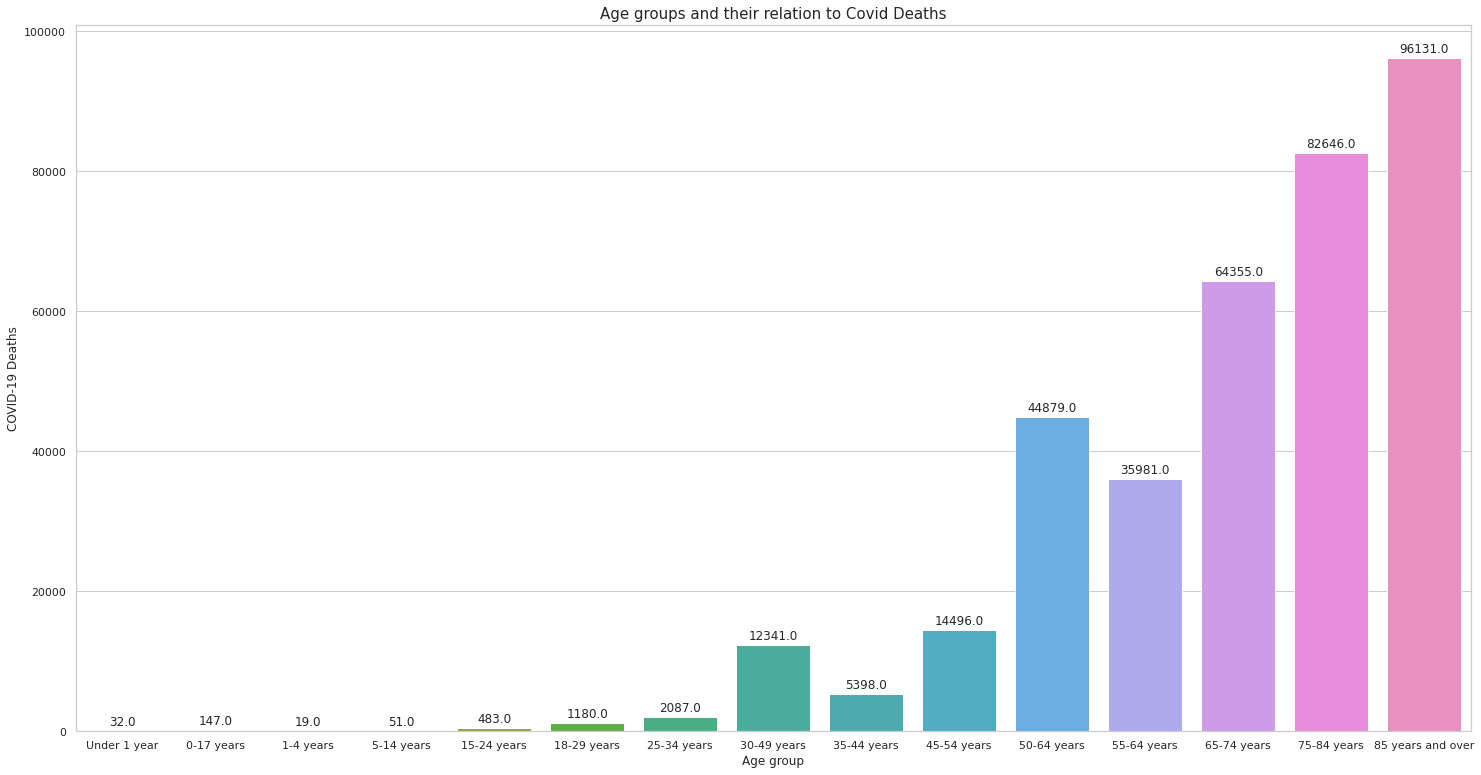

,mean,std
COVID-19 Deaths,24015.066667,33024.429976


In [ ]:
#Bar Graph rona
plt.figure(figsize=(25,13))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y="COVID-19 Deaths", x="Age group", data=dataage)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.title("Age groups and their relation to Covid Deaths",size=15)

#little cute numbers on top with ugly code 
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

#stats
info=dataage.describe().loc[['mean','std']]
info.transpose()



In [ ]:
#Seperation by sex
dataSex=dataset.iloc[16 :48]
dataSex.columns=['Data as of','Start Week','End Week','State','Sex','Age group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths','Footnote']
dataSex=dataSex[['Sex','Age group','COVID-19 Deaths']]


#Seperation Male
dataMale=dataset.iloc[17 :32]
dataMale.columns=['Data as of','Start Week','End Week','State','Sex','Age group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths','Footnote']
dataMale=dataMale[['Age group','COVID-19 Deaths']]

#Seperation Female
dataFemale=dataset.iloc[33:48]
dataFemale.columns=['Data as of','Start Week','End Week','State','Sex','Age group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths','Footnote']
dataFemale=dataFemale[['Age group','COVID-19 Deaths']]

#print(dataMale)
#print(dataFemale)
#print(dataSex)

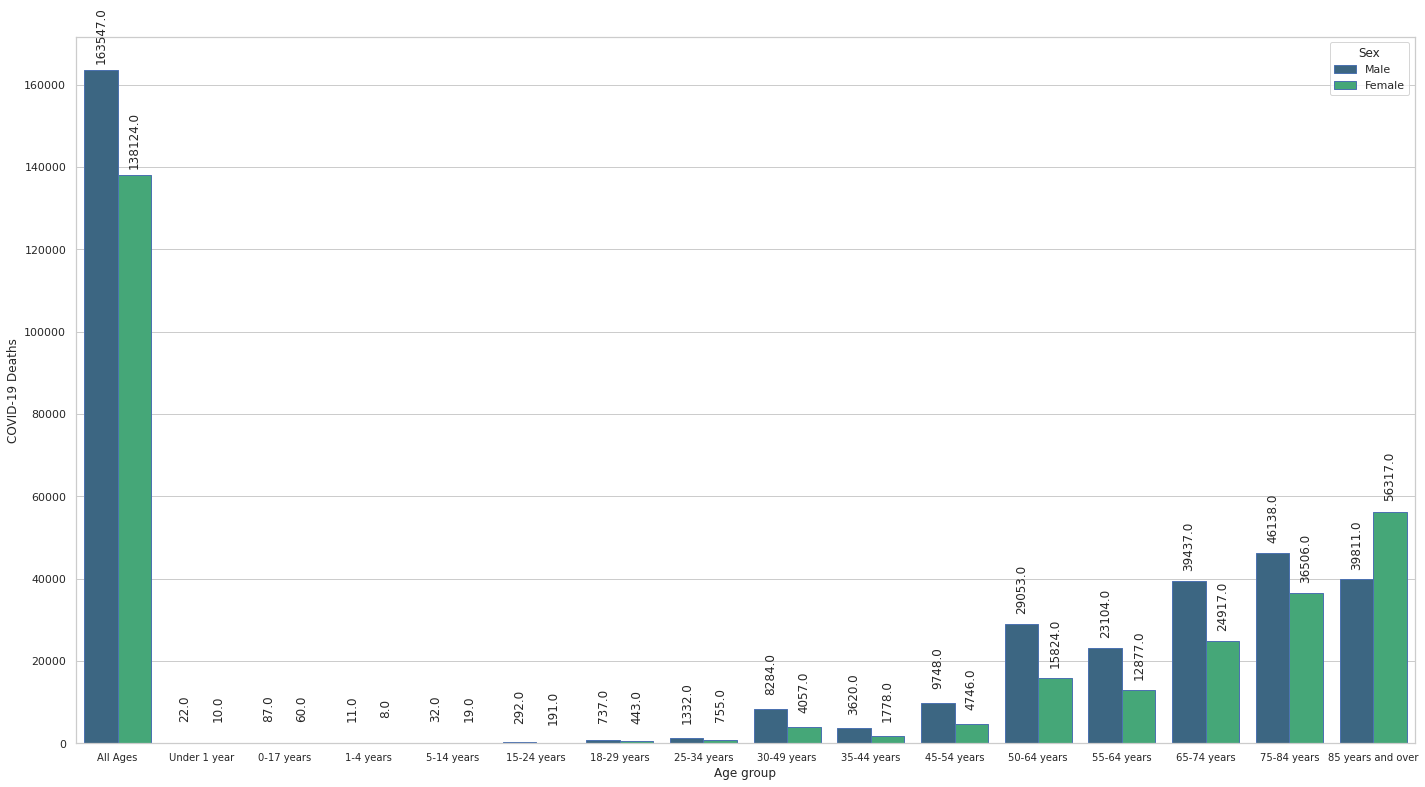

Male Statistics
                    mean           std
COVID-19 Deaths  13447.2  17141.295076

Female Statistics
                    mean           std
COVID-19 Deaths  10567.2  16710.415294


In [ ]:
#val=input("Enter 1 for unsimplified graph or for anything") 
#val=int(val)
#if val==1:    
plt.figure(figsize=(24,13))
ax=sns.barplot( x="Age group", y="COVID-19 Deaths", hue = 'Sex', data =dataSex , palette = 'viridis', edgecolor = 'b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center",size=10)

#little cute numbers on top with ugly code 

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 35),rotation=90, 
                  textcoords = 'offset points')

#else:
  #plt.figure(figsize=(24,13))
  #ax=sns.barplot( x="Age group", y="COVID-19 Deaths", hue = 'Sex', data =dataSex , palette = 'magma', edgecolor = 'b')
  #ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center",size=10)


plt.show()

#stats
print('Male Statistics')
info=dataMale.describe().loc[['mean','std']]
print(info.transpose())
print()
print('Female Statistics')
info=dataFemale.describe().loc[['mean','std']]
print(info.transpose())




Total Deaths VS Corona
Equation:8.600394523227898x + 620.3918135341637
coefficient of determination: 0.8777364326489376
 
Total Deaths VS Pneumonia
Equation:9.392257336260036x + 391.80688904064573
coefficient of determination: 0.9655073491824392
 
Total Deaths VS Influenza
Equation:297.8959179784627x + 1675.5757354136022
coefficient of determination: 0.6452625314803478


<function matplotlib.pyplot.show>

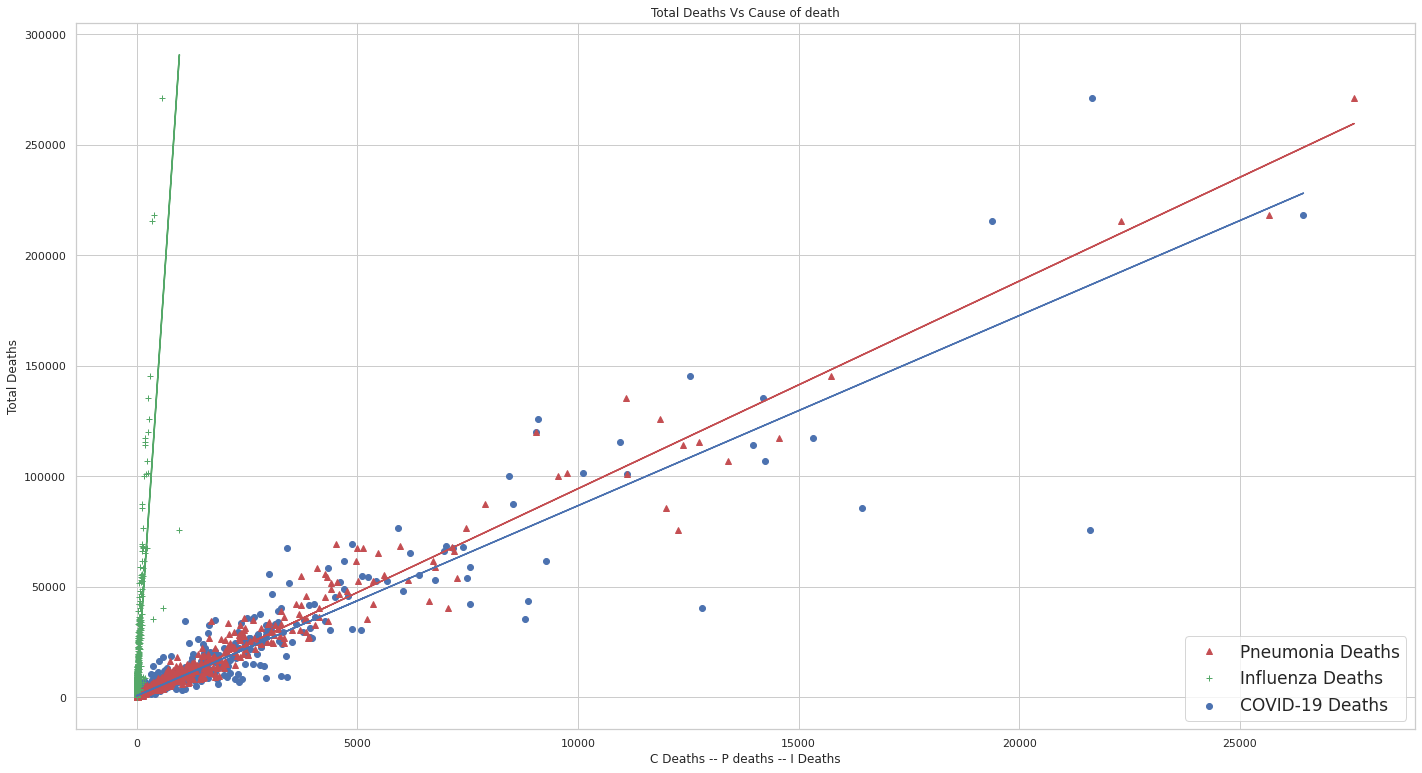

In [ ]:
dataPlot=dataset[['Total Deaths','COVID-19 Deaths']] #Seperation
dataPlot2=dataset[['Total Deaths','Pneumonia Deaths']]
dataPlot3=dataset[['Total Deaths','Influenza Deaths']]

plt.figure(figsize=(24,13)) #graph size


dataPlot=dataPlot.iloc[64:] #same amount of rows
dataPlot2=dataPlot2.iloc[64:]
dataPlot3=dataPlot3.iloc[64:]


#Linear Regression
x = dataPlot.iloc[:,1].values.reshape(-1, 1)  #Variable define
y = dataPlot.iloc[:,0].values.reshape(-1, 1)

x2 = dataPlot2.iloc[:,1].values.reshape(-1, 1) 
y2 = dataPlot2.iloc[:,0].values.reshape(-1, 1)

x3 = dataPlot3.iloc[:,1].values.reshape(-1, 1) 
y3 = dataPlot3.iloc[:,0].values.reshape(-1, 1)

model=LinearRegression().fit(x,y)   #fitting the models
model2=LinearRegression().fit(x2,y2)
model3=LinearRegression().fit(x3,y3)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor2 = LinearRegression() 
linear_regressor3 = LinearRegression()  

linear_regressor.fit(x, y)  # perform linear regression
linear_regressor2.fit(x2, y2)  
linear_regressor3.fit(x3, y3) 

y_pred = linear_regressor.predict(x)  # make predictions
y_pred2 = linear_regressor2.predict(x2)
y_pred3 = linear_regressor3.predict(x3) 

model.fit(x, y)
model2.fit(x2, y2)
model3.fit(x3, y3)


r_sq = model.score(x, y)    #r^2 value
r_sq2 = model2.score(x2, y2) 
r_sq3 = model3.score(x3, y3) 

b=model.intercept_
a=model.coef_
a=a[0]          #was in an array so had to pull it out for a single float value
a=a[0]
b=b[0]
print('Total Deaths VS Corona')
print("Equation:", a,"x + ",b,sep='')
print('coefficient of determination:', r_sq)


print(" ")
b2=model2.intercept_
a2=model2.coef_
a2=a2[0]
a2=a2[0]
b2=b2[0]

print('Total Deaths VS Pneumonia')
print("Equation:", a2,"x + ",b2,sep='')
print('coefficient of determination:', r_sq2)


print(" ")

b3=model3.intercept_
a3=model3.coef_
a3=a3[0]
a3=a3[0]
b3=b3[0]
print('Total Deaths VS Influenza')
print("Equation:", a3,"x + ",b3,sep='')
print('coefficient of determination:', r_sq3)


#1
plt.scatter(x,y,label="COVID-19 Deaths")   #plots
#2
plt.plot(x2,y2,'r^',label="Pneumonia Deaths")
#3
plt.plot(x3,y3,'g+',label="Influenza Deaths")
plt.plot(x3,y_pred3,'g',x2,y_pred2,'r',x,y_pred,'b')
plt.legend(fontsize=17)

plt.title('Total Deaths Vs Cause of death')
plt.xlabel('C Deaths -- P deaths -- I Deaths')
plt.ylabel('Total Deaths')



plt.show


<function matplotlib.pyplot.show>

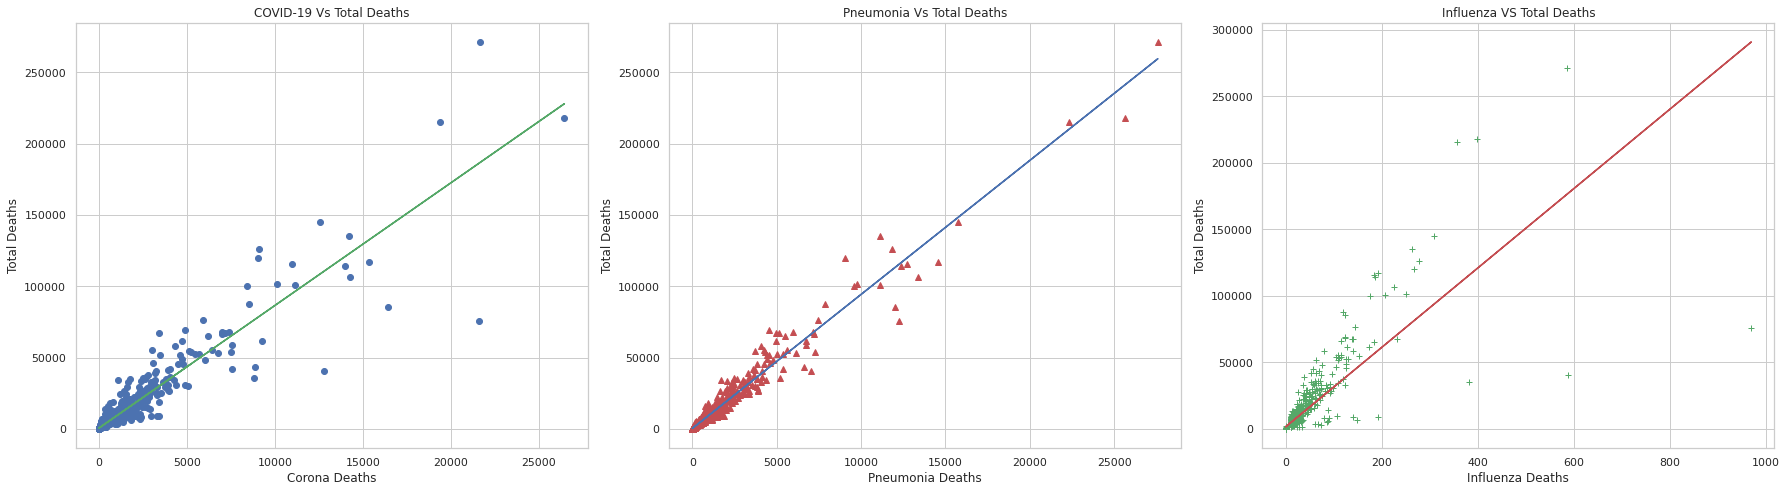

In [ ]:
#subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(25,7))

#1
ax1.scatter(x, y)
ax1.plot(x,y_pred,'g')

ax1.set_title('COVID-19 Vs Total Deaths')
ax1.set_xlabel('Corona Deaths')
ax1.set_ylabel('Total Deaths')

#2
ax2.plot(x2,y2,'r^')
ax2.plot(x2,y_pred2,'b')


ax2.set_title('Pneumonia Vs Total Deaths')
ax2.set_xlabel("Pneumonia Deaths")
ax2.set_ylabel('Total Deaths')


#3
ax3.plot(x3,y3,'g+')
ax3.plot(x3,y_pred3,'r')


ax3.set_title('Influenza VS Total Deaths')
ax3.set_xlabel('Influenza Deaths')
ax3.set_ylabel('Total Deaths')


#fixing weird sizing
plt.tight_layout()

plt.show

ANOVA Test


,count,mean,std,min,25%,50%,75%,max
Under 1 year,81.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
0-17 years,55.0,0.509091,2.672720,0.0,0.00,0.0,0.00,16.0
1-4 years,89.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
5-14 years,77.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
15-24 years,37.0,7.756757,10.889356,0.0,0.00,0.0,13.00,36.0
18-29 years,43.0,21.511628,23.312956,0.0,5.00,16.0,25.00,103.0
25-34 years,58.0,32.413793,37.496215,0.0,11.00,19.5,38.75,196.0
30-49 years,92.0,134.108696,200.907417,0.0,30.00,63.0,129.25,1199.0
35-44 years,79.0,67.303797,92.643977,0.0,20.00,36.0,70.50,509.0
45-54 years,94.0,154.638298,228.280051,10.0,35.75,76.0,154.50,1355.0


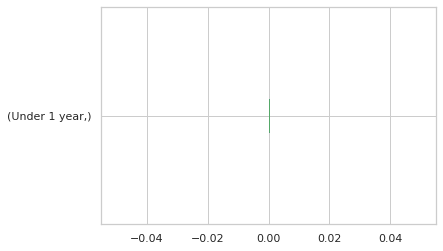

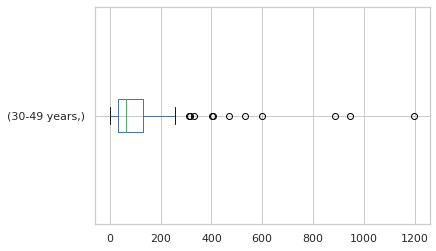

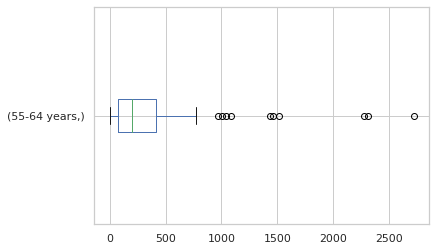

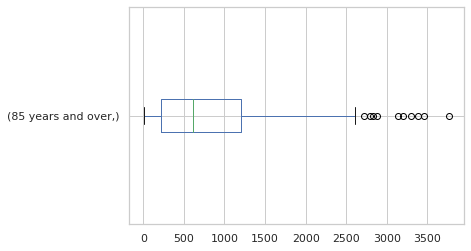

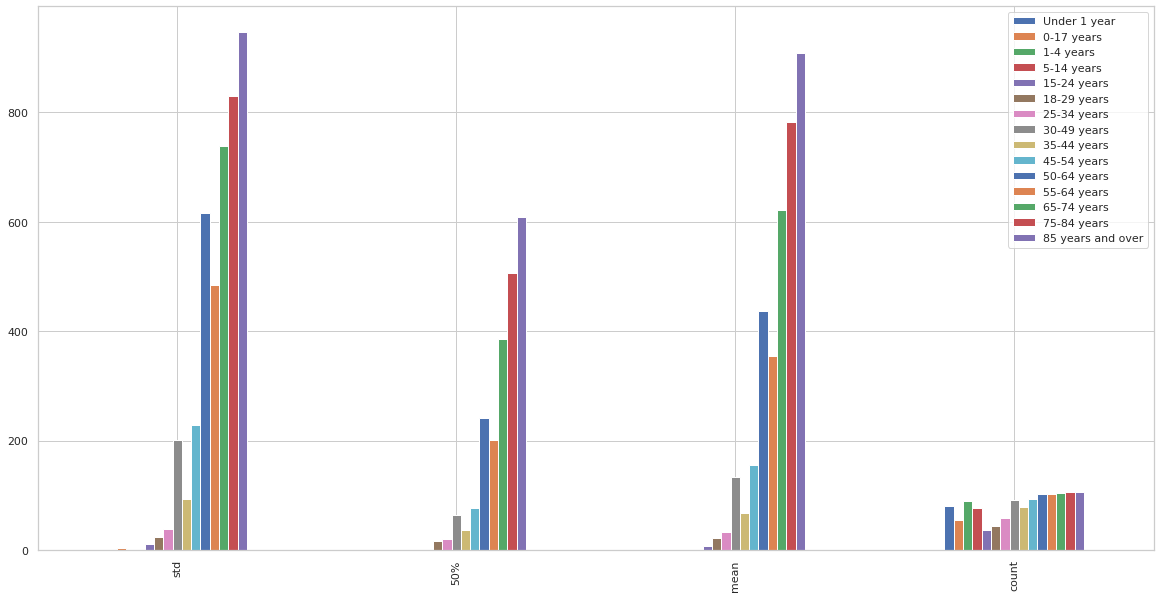

Rules:
Normally Distributed
Each death independent of the other
Similar variation between groups

P Value for ANOVA test: 3.199007404207511e-82


In [ ]:
#reset data
dataclear=pd.DataFrame()
dataANOVA=dataclear
dataANOVA = dataANOVA.iloc[0:0]

#brain hurts dont touch

#takes 29 rows ignores next 49, takes 29 ignores next 49
count=66 #start row
while count<2662: #reiteration to end of df
  if((count-66)%49==0): #takes every 49th row ignoring the unknown gender and alls
    dataANOVA=dataANOVA.append(dataUnfiltered.iloc[count:count+31,:]) #attatches state males-females, list of 31
  count=count+1 #continues the loop

#brain hurts dont touch


#DROPPING USELESS COLUMNS AND ROWS
dataANOVA.drop(["Data as of", "Start Week",'End Week','Pneumonia, Influenza, or COVID-19 Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths'], axis = 1, inplace = True) 

#DROPPING IMPORTANT THINGS
dataANOVA.drop(['State','Sex','Total Deaths','Pneumonia Deaths','Footnote'], axis = 1, inplace = True)

#####AGE SEPERATION

#age catagories
age1 = ['Under 1 year'] 
age2 = ['0-17 years']   
age3 = ['1-4 years'] 
age4 = ['5-14 years'] 
age5 = ['15-24 years'] 
age6 = ['18-29 years'] 
age7 = ['25-34 years'] 
age8 = ['30-49 years'] 
age9 = ['35-44 years'] 
age10 = ['45-54 years'] 
age11 = ['50-64 years'] 
age12 = ['55-64 years'] 
age13 = ['65-74 years'] 
age14 = ['75-84 years'] 
age15 = ['85 years and over'] 


#age dataANOVAs
dataage1 = dataANOVA.loc[dataANOVA['Age group'].isin(age1)] 
dataage2 = dataANOVA.loc[dataANOVA['Age group'].isin(age2)] 
dataage3 = dataANOVA.loc[dataANOVA['Age group'].isin(age3)] 
dataage4 = dataANOVA.loc[dataANOVA['Age group'].isin(age4)] 
dataage5 = dataANOVA.loc[dataANOVA['Age group'].isin(age5)] 
dataage6 = dataANOVA.loc[dataANOVA['Age group'].isin(age6)] 
dataage7 = dataANOVA.loc[dataANOVA['Age group'].isin(age7)] 
dataage8 = dataANOVA.loc[dataANOVA['Age group'].isin(age8)] 
dataage9 = dataANOVA.loc[dataANOVA['Age group'].isin(age9)] 
dataage10= dataANOVA.loc[dataANOVA['Age group'].isin(age10)] 
dataage11= dataANOVA.loc[dataANOVA['Age group'].isin(age11)] 
dataage12= dataANOVA.loc[dataANOVA['Age group'].isin(age12)] 
dataage13= dataANOVA.loc[dataANOVA['Age group'].isin(age13)] 
dataage14= dataANOVA.loc[dataANOVA['Age group'].isin(age14)] 
dataage15= dataANOVA.loc[dataANOVA['Age group'].isin(age15)] 

#MAKING THEM THEIR OWN MATRIX INSTEAD OF A SLICE

dataage1 = dataage1.copy()
dataage2 = dataage2.copy()
dataage3 = dataage3.copy()
dataage4 = dataage4.copy()
dataage5 = dataage5.copy()
dataage6 = dataage6.copy()
dataage7 = dataage7.copy()
dataage8 = dataage8.copy()
dataage9 = dataage9.copy()
dataage10 = dataage10.copy()
dataage11 = dataage11.copy()
dataage12 = dataage12.copy()
dataage13 = dataage13.copy()
dataage14 = dataage14.copy()
dataage15 = dataage15.copy()

#DROPPING AGE GROUP
#CANT DELETE EARLIER NEEDED FOR FILTERING
dataage1.drop(['Age group'], axis = 1, inplace = True)
dataage2.drop(['Age group'], axis = 1, inplace = True)
dataage3.drop(['Age group'], axis = 1, inplace = True)
dataage4.drop(['Age group'], axis = 1, inplace = True)
dataage5.drop(['Age group'], axis = 1, inplace = True)
dataage6.drop(['Age group'], axis = 1, inplace = True)
dataage7.drop(['Age group'], axis = 1, inplace = True)
dataage8.drop(['Age group'], axis = 1, inplace = True)
dataage9.drop(['Age group'], axis = 1, inplace = True)
dataage10.drop(['Age group'], axis = 1, inplace = True)
dataage11.drop(['Age group'], axis = 1, inplace = True)
dataage12.drop(['Age group'], axis = 1, inplace = True)
dataage13.drop(['Age group'], axis = 1, inplace = True)
dataage14.drop(['Age group'], axis = 1, inplace = True)
dataage15.drop(['Age group'], axis = 1, inplace = True)


#Dropping Unknowns so data mean isn't skewed
dataage1.dropna(inplace= True)
dataage2.dropna(inplace= True)
dataage3.dropna(inplace= True)
dataage4.dropna(inplace= True)
dataage5.dropna(inplace= True)
dataage6.dropna(inplace= True)
dataage7.dropna(inplace= True)
dataage8.dropna(inplace= True)
dataage9.dropna(inplace= True)
dataage10.dropna(inplace= True)
dataage11.dropna(inplace= True)
dataage12.dropna(inplace= True)
dataage13.dropna(inplace= True)
dataage14.dropna(inplace= True)
dataage15.dropna(inplace= True)




#ANOVA TEST
print('ANOVA Test')
f,p=f_oneway(dataage1,dataage2,dataage3,dataage4,dataage5,dataage6,dataage7,dataage8,dataage9,dataage10,dataage11,dataage12,dataage13,dataage14,dataage15)



dataage1.columns=[age1]
d1=dataage1.describe()

dataage2.columns=[age2]
d2=dataage2.describe()

dataage3.columns=[age3]
d3=dataage3.describe()

dataage4.columns=[age4]
d4=dataage4.describe()

dataage5.columns=[age5]
d5=dataage5.describe()

dataage6.columns=[age6]
d6=dataage6.describe()

dataage7.columns=[age7]
d7=dataage7.describe()

dataage8.columns=[age8]
d8=dataage8.describe()

dataage9.columns=[age9]
d9=dataage9.describe()

dataage10.columns=[age10]
d10=dataage10.describe()

dataage11.columns=[age11]
d11=dataage11.describe()

dataage12.columns=[age12]
d12=dataage12.describe()

dataage13.columns=[age13]
d13=dataage13.describe()

dataage14.columns=[age14]
d14=dataage14.describe()

dataage15.columns=[age15]
d15=dataage15.describe()


#Connecting into one describe table
info=d1.assign(age2= d2)
info=info.assign(age3= d3)
info=info.assign(age4= d4)
info=info.assign(age5= d5)
info=info.assign(age6= d6)
info=info.assign(age7= d7)
info=info.assign(age8= d8)
info=info.assign(age9= d9)
info=info.assign(age10= d10)
info=info.assign(age11= d11)
info=info.assign(age12= d12)
info=info.assign(age13= d13)
info=info.assign(age14= d14)
info=info.assign(age15= d15)

#renaming columns
info.columns = [age1[0],age2[0],age3[0],age4[0],age5[0],age6[0],age7[0],age8[0],age9[0],age10[0],age11[0],age12[0],age13[0],age14[0],age15[0]]
display(info.transpose())

#graphing to show variability
dataage1.plot(kind="box",vert=False)
dataage8.plot(kind="box",vert=False)
dataage12.plot(kind="box",vert=False)
dataage15.plot(kind="box",vert=False)

#std median mean and n for graphs
info=info.loc[['std','50%','mean','count']]
info.plot(kind="bar",figsize=(20, 10))

plt.show()
#Not normally distrib. PWC
#Each death is indepedent of the other, wasnt a bomb or something
#Different variation between groups, PWC
print('Rules:\nNormally Distributed\nEach death independent of the other\nSimilar variation between groups\n')
print('P Value for ANOVA test:',p[0])
#print('There is evidence that there is a stastically significant difference between Age group death averages at an alpha value of 1% however the results should be taken with caution due to largely differing sample variations and skewed distributions')

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  #FULL DISPLAY SETTINGS



In [ ]:
########################################## SIDE BY SIDE DATAFRAME VIEWER
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
########################################## SIDE BY SIDE DATAFRAME VIEWER


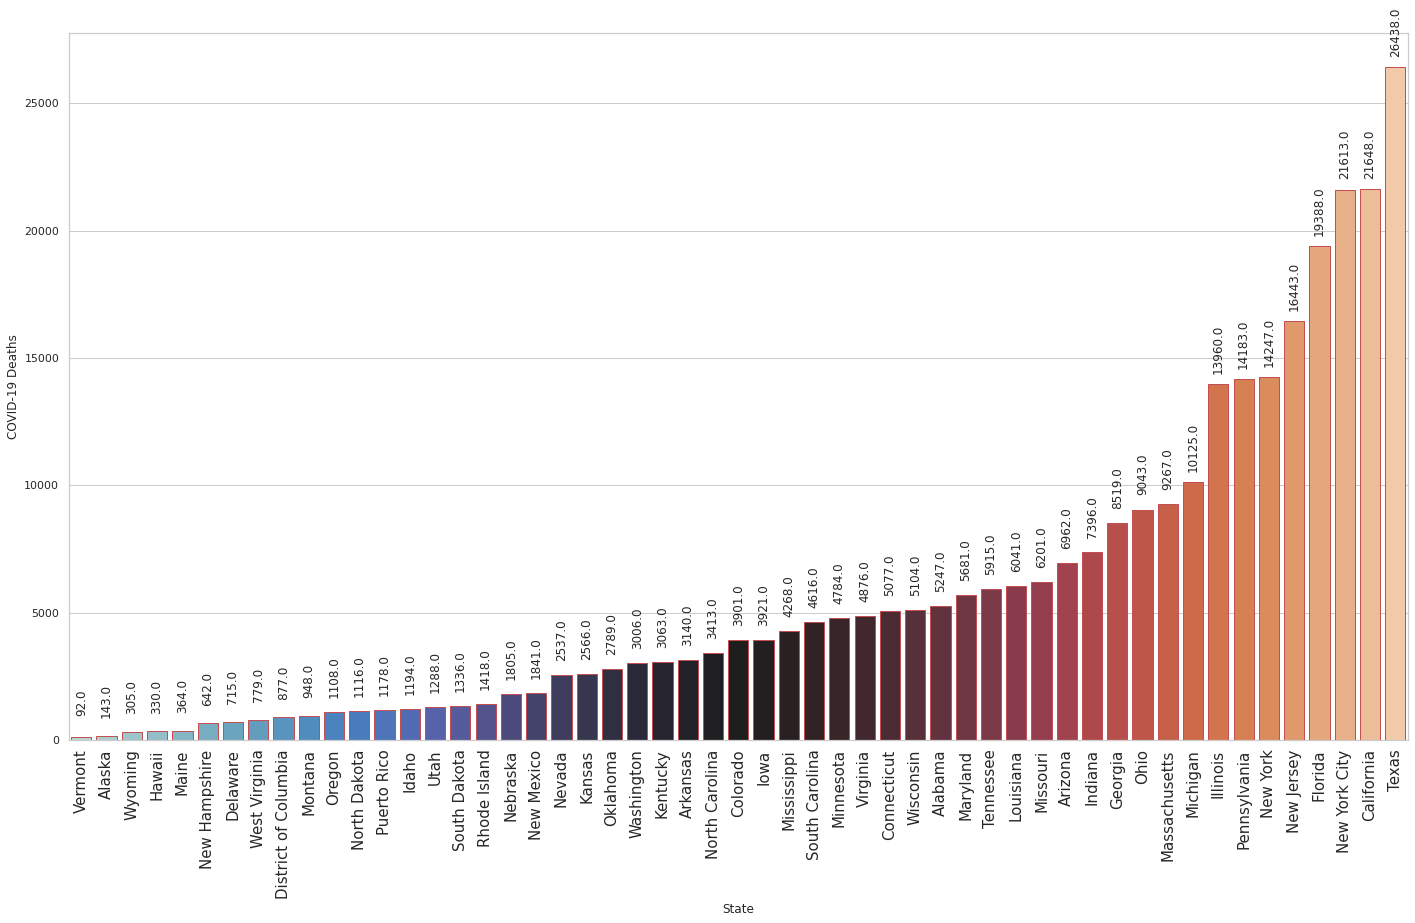

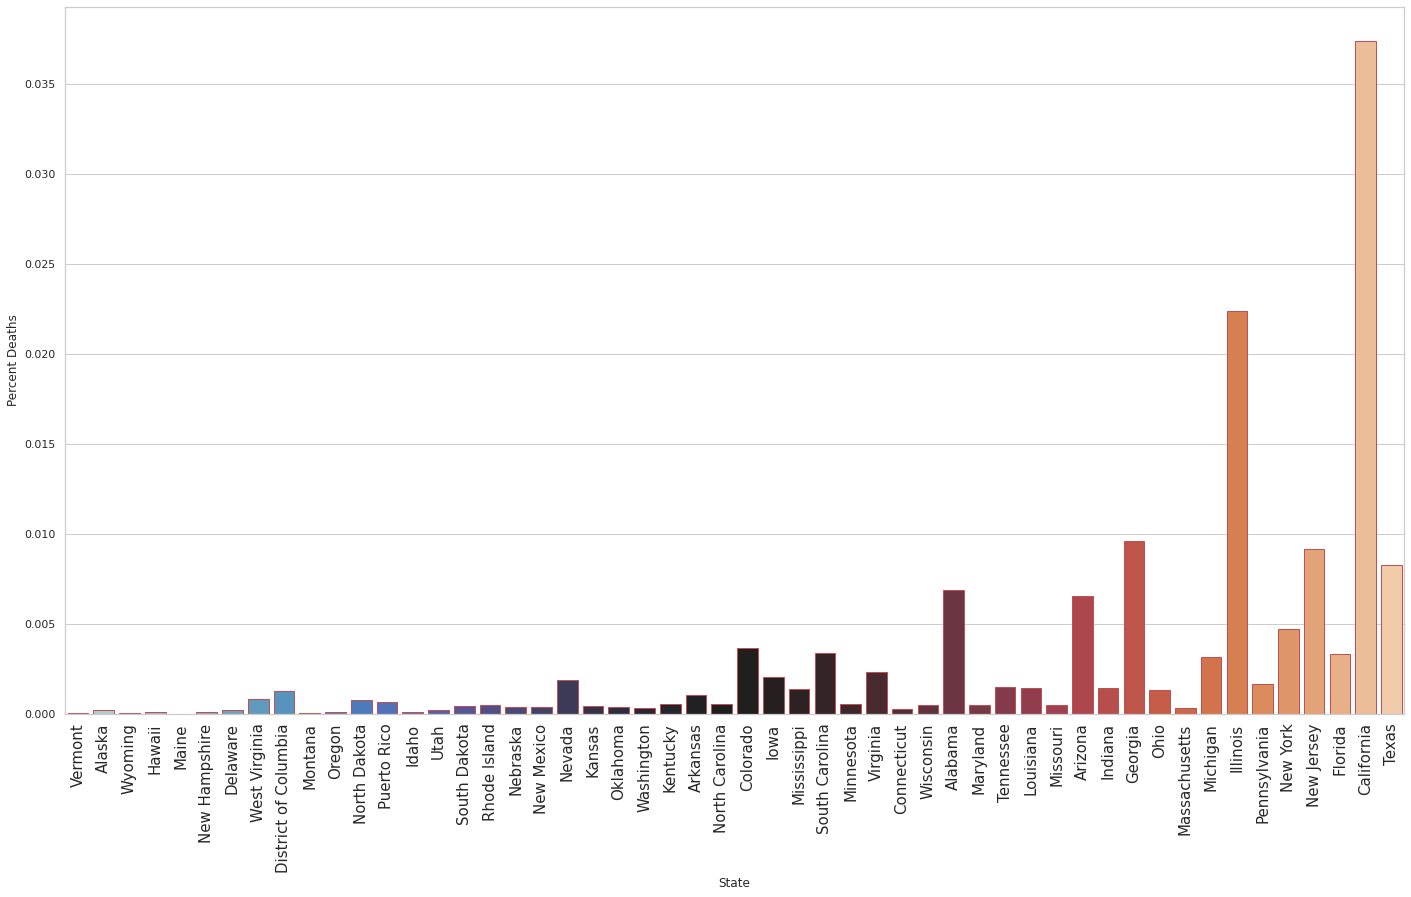

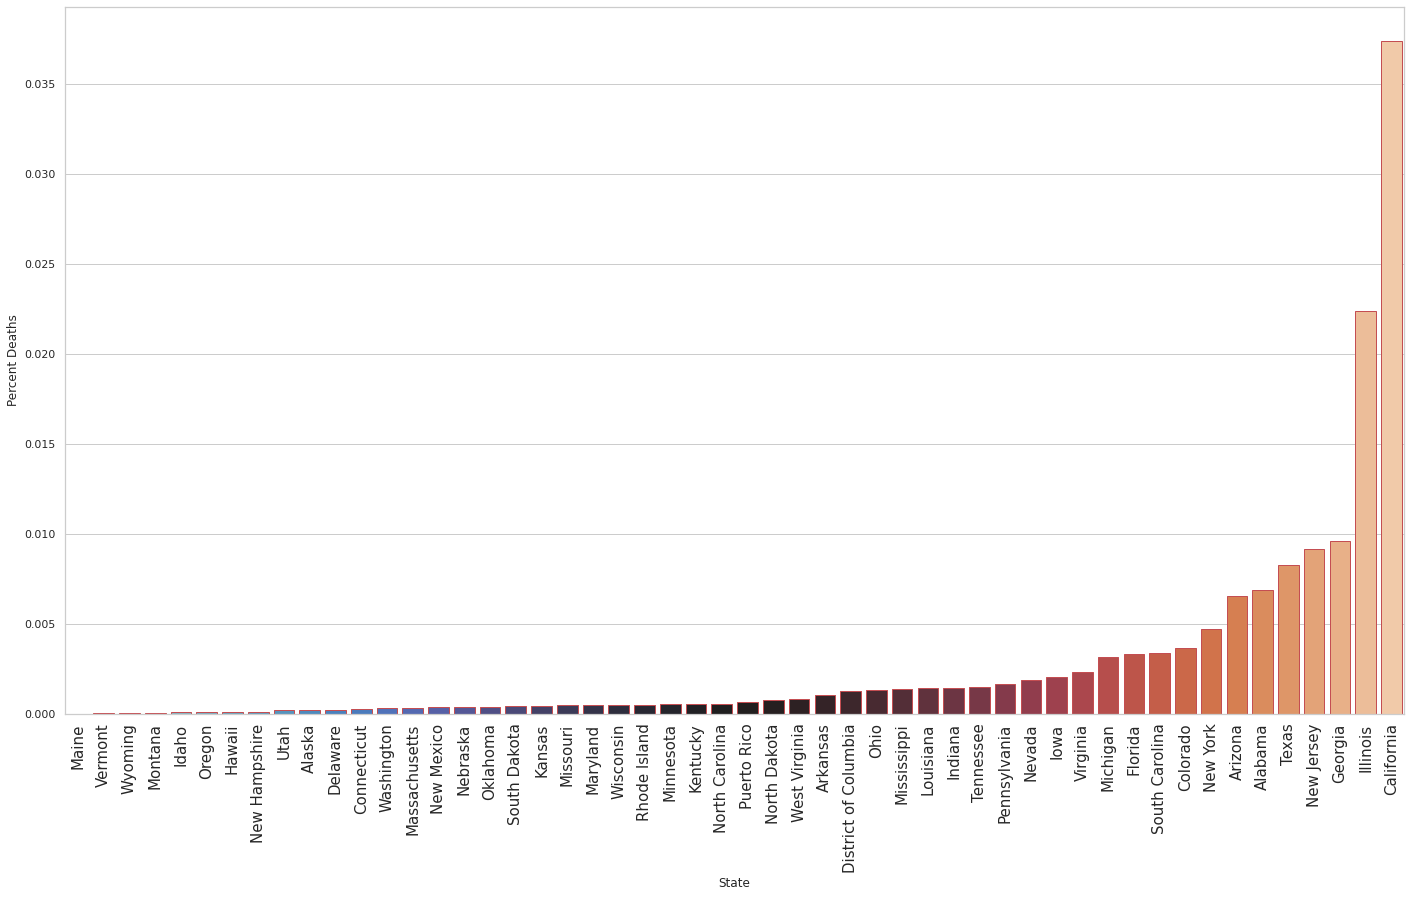

In [ ]:
#Population import and read
url2='http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv'

#Copying the file into workable variable
pop=pd.read_csv(url2)

#dropping weird stuff
pop.drop(pop.columns.difference(['NAME','POPESTIMATE2019']), 1, inplace=True)
pop.drop([0,1,2,3,4],inplace=True)

#grabbing each state
dataState=dataUnfiltered.iloc[64::49, :]
dataState=dataState.copy()

#dropping useless stuff
dataState.drop(["Data as of", "Start Week",'End Week','Pneumonia, Influenza, or COVID-19 Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Footnote','Sex','Total Deaths','Pneumonia Deaths','Age group'], axis = 1, inplace = True) 
#

dataState.sort_values('COVID-19 Deaths',ascending=[True],inplace=True)

#plotty
plt.figure(figsize=(24,13))
ax=sns.barplot( x="State", y="COVID-19 Deaths", data =dataState , palette = 'icefire', edgecolor = 'r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",size=15)

#little cute numbers on top with ugly code 
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 35),rotation=90, 
                  textcoords = 'offset points')
plt.show()

dataState.columns=['State','deaths']
#Grouper

grouped = dataState.groupby(dataState.State)
lol=dataState.deaths[1632]+dataState.deaths[1681]
dataState.loc[1632]='New York',lol

#bye new york city
dataState.drop([1681],inplace=True)
#dataState.drop(columns=['State'],inplace=True)


#list of state 
x='Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York','New York City', 'North Carolina', 'North Dakota',  'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming','Puerto Rico'
counter=0
#while(counter>=55)
d = {}
c=0

#for state in x:
#    d[state]=grouped.get_group(x[c])
#    c=c+1
#display()

#del d['New York City']

#clean up
dataState.reset_index(inplace=True)
pop.reset_index(inplace=True)
dataState.drop(columns='index',inplace=True)
pop.drop(columns='index',inplace=True)


#display_side_by_side(dataState,pop)
#percent setup
d = dataState['deaths']/pop['POPESTIMATE2019'] 
#attatching state to name
d= pd.concat([d,dataState], axis=1)
#dropping deaths useless
d.drop(columns='deaths',inplace=True)

#reversing columns
d=d[d.columns[::-1]]
#correcting column name
d.rename(columns={0:"Percent Deaths"},inplace=True)



#graphing for comparasin with first graph
plt.figure(figsize=(24,13))
ax1=sns.barplot( x="State", y="Percent Deaths", data =d , palette = 'icefire', edgecolor = 'r')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="center",size=15)
plt.show()

#secondary graph on its own
d.sort_values('Percent Deaths',ascending=[True],inplace=True)

plt.figure(figsize=(24,13))
ax2=sns.barplot( x="State", y="Percent Deaths", data =d , palette = 'icefire', edgecolor = 'r')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="center",size=15)

plt.show()

#setting up for map graph
d.sort_values('State',ascending=[True],inplace=True)
d.drop(['State'],axis = 1, inplace = True)
#bye rico
d.drop([12],inplace=True)
#reseting for test
d.reset_index(inplace=True)
d.drop(['index'],axis=1,inplace=True)


In [ ]:
from google.colab import files 

In [ ]:
#DONT RERUN #DONT RERUN #DONT RERUN #DONT RERUN #DONT RERUN
up = files.upload() #DONT RERUN #DONT RERUN #DONT RERUN #DONT RERUN
#DONT RERUN #DONT RERUN #DONT RERUN #DONT RERUN #DONT RERUN

Saving States_shapefile.cpg to States_shapefile (1).cpg
Saving States_shapefile.dbf to States_shapefile (1).dbf
Saving States_shapefile.prj to States_shapefile (1).prj
Saving States_shapefile.shp to States_shapefile (1).shp
Saving States_shapefile.shx to States_shapefile (1).shx


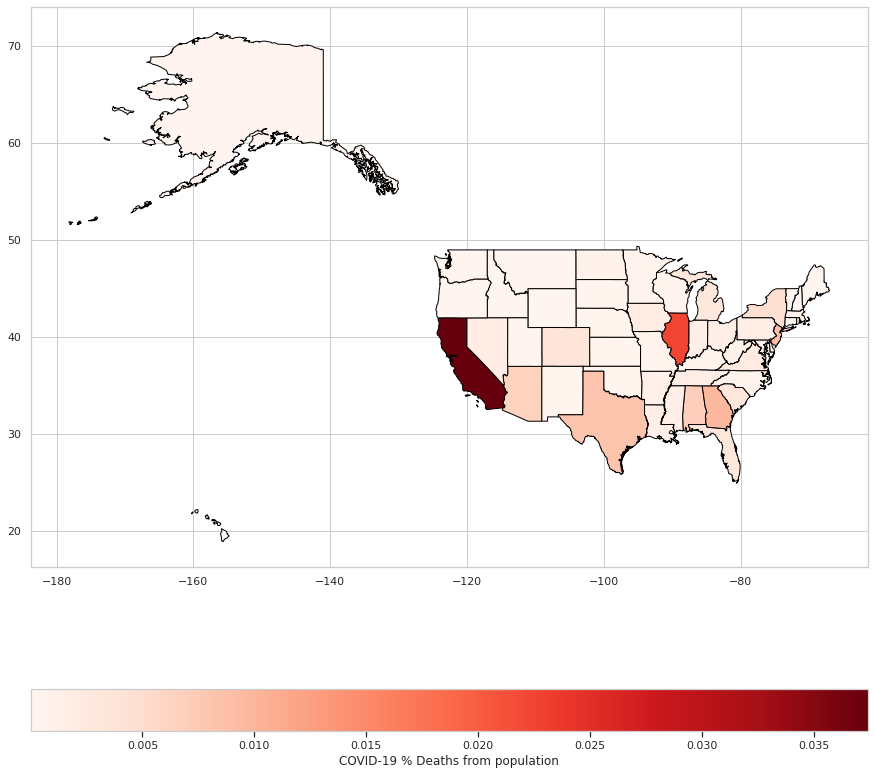

In [ ]:
import geopandas as gpd
#inputs
gdf = gpd.read_file('States_shapefile.shp')
#display(d)
#display(gdf)
#replace random column with death rates
gdf['FID'] = d
########################################## color setter    legend maker         titles and stuf                                       side ways                 red colormap
gdf.plot(figsize=(15,15),edgecolor="black",column='FID', legend=True,legend_kwds={'label': "COVID-19 % Deaths from population", 'orientation': "horizontal"},cmap='Reds')

plt.show()